# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *LaplacianOperator*
Detect edges by the Laplacian operator

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL, plotImageF
from ConvolutionUtilities import createLaplacianKernel, applyKernelF

# Iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel
    sigma = Standard deviation of the kernel

In [2]:
imageName = "Lizard.png"
kernelSize = 12
sigma = 2

### Read and show input image

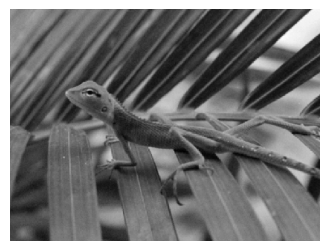

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create and apply Laplacian kernel

In [4]:
kernelLaplacian = createLaplacianKernel(kernelSize, sigma)
gaussianImage = applyKernelF(inputImage, kernelLaplacian)

### Zero-crossing detector

In [5]:
edges = createImageL(width, height)
kernelCentre = int((kernelSize - 1) / 2)
for x,y in itertools.product(range(1, width-1), range(1, height-1)):
    quadrantValue = [0.0, 0.0, 0.0, 0.0]
    for wx,wy in itertools.product(range(-1, 1), range(-1, 1)):
            quadrantValue[0] += gaussianImage[y+wy, x+wx]
            
    for wx,wy in itertools.product(range(-1, 1), range(0, 2)):
            quadrantValue[1] += gaussianImage[y+wy, x+wx]
    
    for wx,wy in itertools.product(range(0, 2), range(-1, 1)):
            quadrantValue[2] += gaussianImage[y+wy, x+wx]
    
    for wx,wy in itertools.product(range(0, 2), range(0, 2)):
            quadrantValue[3] += gaussianImage[y+wy, x+wx]
                
    maxVal,minVal = max(quadrantValue), min(quadrantValue)      
    
    if maxVal > 0.0 and minVal < 0:
        edges[y,x] = 255  

### Show result

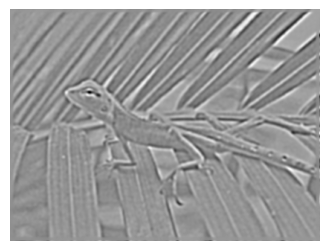

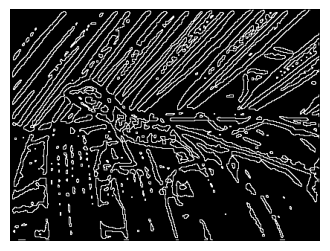

In [6]:
plotImageF(gaussianImage, figureSize = 4)
plotImageL(edges, figureSize = 4)
